In [1]:
!pip install rudalle==0.0.1rc5 > /dev/null

In [2]:
from rudalle.pipelines import generate_images, show, super_resolution, cherry_pick_by_clip
from rudalle.image_prompts import ImagePrompts
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan, get_ruclip
from rudalle.utils import seed_everything

2021-11-05 15:07:58.768069: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [3]:
device = 'cuda'
dalle = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device)

◼️ Malevich is 1.3 billion params model from the family GPT3-like, that uses Russian language and text+image multi-modality.


In [4]:
realesrgan = get_realesrgan('x4', device=device)
tokenizer = get_tokenizer()
vae = get_vae().to(device)
ruclip, ruclip_processor = get_ruclip('ruclip-vit-base-patch32-v5')
ruclip = ruclip.to(device)

x4 --> ready
tokenizer --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.
vae --> ready
ruclip --> ready


## image prompts to dress manequins by ruDALLE

In [5]:
from collections import defaultdict
import requests
from PIL import Image
import torch

mannequin_woman_url = 'https://manekens.ru/storage/app/uploads/public/34/5d25eabf21090114407732.jpg'
mannequin_man_url = 'https://ncm-torg.ru/wp-content/uploads/2019/08/CGE-11.jpg'

mannequin_woman = Image.open(requests.get(mannequin_woman_url, stream=True).raw).resize((256, 256))
mannequin_man = Image.open(requests.get(mannequin_man_url, stream=True).raw).resize((256, 256))

In [6]:
pt_items = {
    'woman': {
        'prompt': ImagePrompts(
            mannequin_woman, 
            {'up': 5, 'left': 0, 'right': 0, 'down': 0}, 
            vae, 
            torch.device('cuda'), 
            crop_first=True
        ),
        'texts': [
            'красивое красное платье на манекене',
            'зеленый женский наряд на манекене',
        ]
    },
    'man': {
        'prompt': ImagePrompts(
            mannequin_man, 
            {'up': 7, 'left': 0, 'right': 0, 'down': 0}, 
            vae, 
            torch.device('cuda'), 
            crop_first=True
        ),
        'texts': [
            'белый праздничный мужской костюм на манекене',
            'черный смокинг на манекене',
        ]
    }
}

/home/user/conda/lib/python3.7/site-packages/taming/modules/diffusionmodules/model.py:137: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in channels_last format. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorIterator.cpp:924.)
  return x+h


In [7]:
all_images = defaultdict(list)

for name, item in pt_items.items():
    seed_everything(42)
    for text in item['texts']:
        pil_images = []
        for top_k, top_p, images_num in [
            (2048, 0.995, 3),
            (1536, 0.99, 3),
            (1024, 0.99, 3),
            (1024, 0.98, 3),
            (512, 0.97, 3),
            (384, 0.96, 3),
            (256, 0.95, 3),
            (128, 0.95, 3), 
        ]:
            _pil_images, _ = generate_images(
                text,
                tokenizer,
                dalle,
                vae,
                top_k=top_k,
                images_num=images_num,
                image_prompts=item['prompt'],
                top_p=top_p,
                use_cache=True
            )
            pil_images += _pil_images
        top_images, _ = cherry_pick_by_clip(pil_images, text, ruclip, ruclip_processor, device=device, count=6)
        all_images[name] += super_resolution(top_images, realesrgan)

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

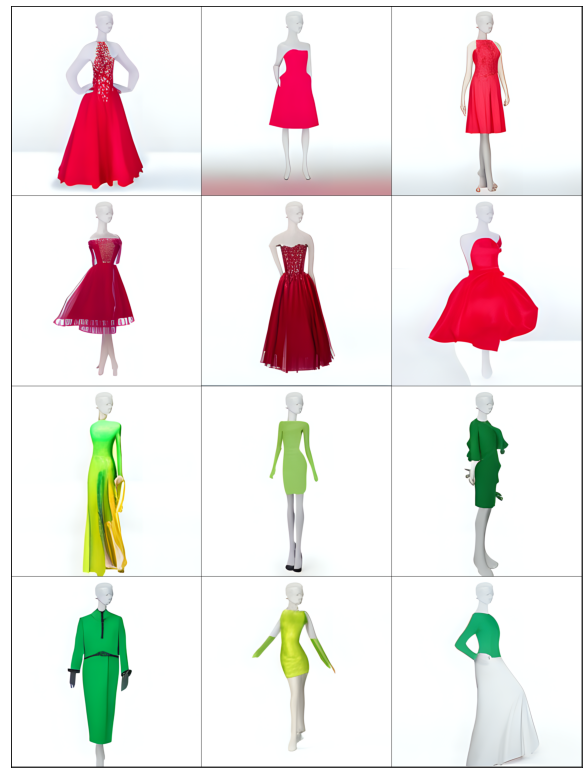

In [8]:
show(all_images['woman'], 3)

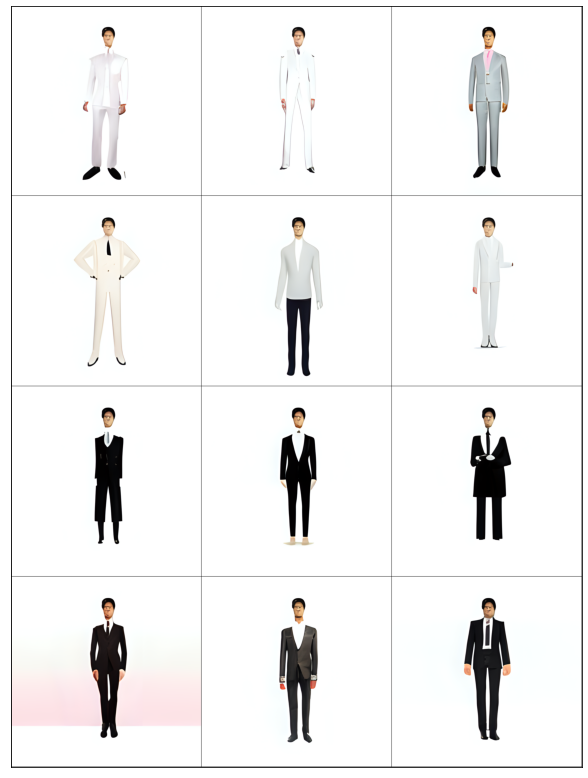

In [9]:
show(all_images['man'], 3)